<a href="https://colab.research.google.com/github/Naresh9395/Gold-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Import Data Set

In [ ]:
pwd

'/content'

In [ ]:
df = pd.read_csv('/content/car data.xls')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
df.Fuel_Type.describe()

count        301
unique         3
top       Petrol
freq         239
Name: Fuel_Type, dtype: object

In [ ]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Missing Values

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

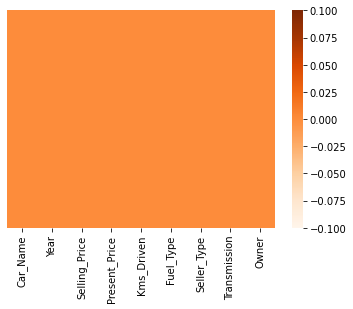

In [ ]:
sn.heatmap(df.isnull(), cmap = 'Oranges', yticklabels = False)

Adding new column to identify no.of year

In [ ]:
df['num_years'] = 2021 - df['Year']

In [ ]:
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [ ]:
df.shape

(301, 10)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'num_years'],
      dtype='object')

In [ ]:
 df.drop(['Car_Name', 'Year'], axis = 1, inplace = True)

In [ ]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

AxesSubplot(0.125,0.125;0.133621x0.755)
AxesSubplot(0.285345,0.125;0.133621x0.755)
AxesSubplot(0.44569,0.125;0.133621x0.755)
AxesSubplot(0.606034,0.125;0.133621x0.755)


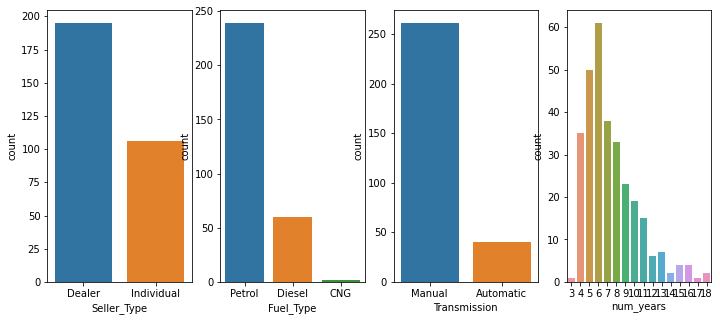

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
print(sn.countplot(df['Seller_Type']))
plt.subplot(1,5,2)
print(sn.countplot(df['Fuel_Type']))
plt.subplot(1,5,3)
print(sn.countplot(df['Transmission']))
plt.subplot(1,5,4)
print(sn.countplot(df['num_years']))
plt.show()

Creating Dummy Variables to treat Categorical Variables

In [ ]:
 df = pd.get_dummies(df, drop_first= True)

In [ ]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


Correlation Using Heat map

In [ ]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
num_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


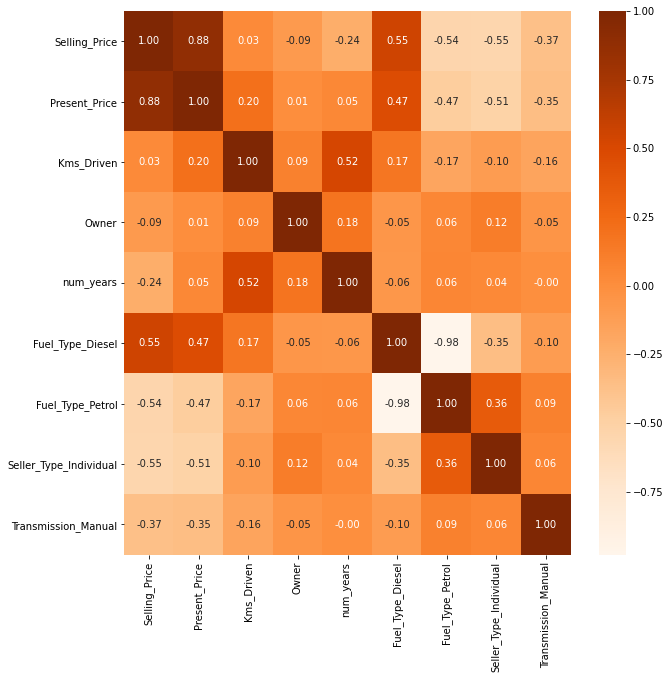

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(), cmap='Oranges', annot= True, fmt='.2f', annot_kws= {'size':10})

y = df['Selling price']
x = df.drop(['Selling_Price'], axis = 1)

In [ ]:
 x = df.iloc[:, 1:]

In [ ]:
y = df.iloc[:, 0]

Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

240
61
240
61


Feature Scalling



In [ ]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()
x_train = sdscaler.fit_transform(x_train)
x_test = sdscaler.fit_transform(x_test)

In [ ]:
x_test

array([[ 1.25229390e-01, -8.86656252e-01, -2.56632451e-01,
        -9.37084310e-01, -4.94871659e-01,  5.20416500e-01,
        -7.51067616e-01, -2.13200716e+00],
       [-3.71023931e-01, -2.37295131e-01, -2.56632451e-01,
         2.21607776e-01, -4.94871659e-01,  5.20416500e-01,
        -7.51067616e-01,  4.69041576e-01],
       [-8.51244451e-01, -1.28037571e+00, -2.56632451e-01,
         9.94069167e-01, -4.94871659e-01,  5.20416500e-01,
         1.33143805e+00,  4.69041576e-01],
       [-3.92655486e-01, -8.89220492e-01, -2.56632451e-01,
        -9.37084310e-01, -4.94871659e-01,  5.20416500e-01,
        -7.51067616e-01,  4.69041576e-01],
       [-7.65481698e-01, -8.89220492e-01, -2.56632451e-01,
         2.21607776e-01, -4.94871659e-01,  5.20416500e-01,
         1.33143805e+00,  4.69041576e-01],
       [-4.90954945e-02, -9.98787414e-01, -2.56632451e-01,
        -1.32331501e+00, -4.94871659e-01,  5.20416500e-01,
        -7.51067616e-01,  4.69041576e-01],
       [-8.35466141e-01, -1.389029

In [ ]:
print(x_train)

[[-0.66673828 -0.79549554 -0.16012815 ...  0.50650222  1.36277029
   0.37073003]
 [ 0.82054947 -0.34195293 -0.16012815 ... -1.97432499 -0.73379939
   0.37073003]
 [ 0.19772645  0.80383893 -0.16012815 ... -1.97432499 -0.73379939
   0.37073003]
 ...
 [ 1.24257162  0.44580285 -0.16012815 ...  0.50650222 -0.73379939
   0.37073003]
 [ 0.19772645 -0.52955248 -0.16012815 ...  0.50650222 -0.73379939
   0.37073003]
 [-0.61001487  2.14059611 -0.16012815 ...  0.50650222  1.36277029
   0.37073003]]


Model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm_y_pred = lm.predict(x_test)

Accuracy 

In [ ]:
from sklearn.metrics import r2_score
r2_scoreLR = r2_score(lm_y_pred, y_test)
r2_scoreLR

0.8827095939059011

Model : Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_y_pred = svr.predict(x_test)

In [ ]:
r2_score(y_test, svm_y_pred)

0.7563125685223444

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel= 'rbf', degree= 3 , gamma= 'auto')
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_y_pred1 = svr.predict(x_test)

In [ ]:
r2_scoreSVR = r2_score(y_test, svm_y_pred1)
r2_scoreSVR

0.7563125685223444

Hyper Parameter Tuning =Grid Search CV (Cross Validation)

In [ ]:
from sklearn.model_selection import GridSearchCV
svr1=SVR()
paras={'C':[0.001, 0.1, 1, 2, 5 ,10, 100],
      'degree':[1,2,3,4,5,6,7],
      'gamma':[0.001, 0.1, 1,2 ,5, 10, 100]}

gridsearch=GridSearchCV(estimator=svr1,param_grid=paras, cv=10, n_jobs=-1)
gridsearch.fit(x_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 2, 5, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.1, 1, 2, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gridsearch.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.1}

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=100, degree=1, gamma=0.001)
svr.fit(x_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr.predict(x_test)
r2_scoreSVR = r2_score(y_test, y_pred)

In [ ]:
r2_scoreSVR

0.9013314350646646

Model : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
Ran_y_pred = random.predict(x_test)

In [ ]:
r2_scoreRF = r2_score(Ran_y_pred, y_test)

In [ ]:
r2_scoreRF 

0.8155898291008201

In [ ]:
pd.DataFrame({'model':['Linear Regression','Support Vector Machine', 'Random Forest Regressor'], 'R2 Score':[r2_scoreLR, r2_scoreSVR,r2_scoreRF]})

,model,R2 Score
0,Linear Regression,0.882710
1,Support Vector Machine,0.901331
2,Random Forest Regressor,0.815590


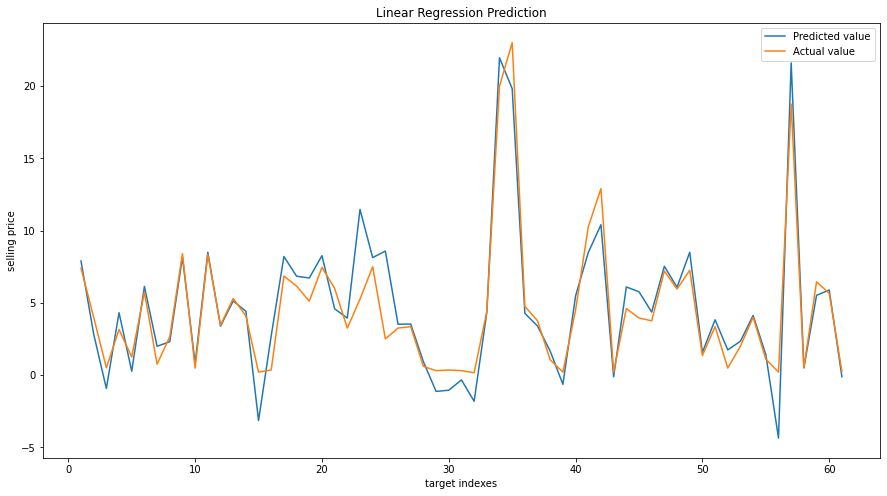

In [ ]:
plt.figure(figsize=(15,8))
index=range(1, len(lm_y_pred)+1)
plt.plot(index, lm_y_pred, label='Predicted value')
plt.plot(index, y_test, label='Actual value')
plt.title('Linear Regression Prediction')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

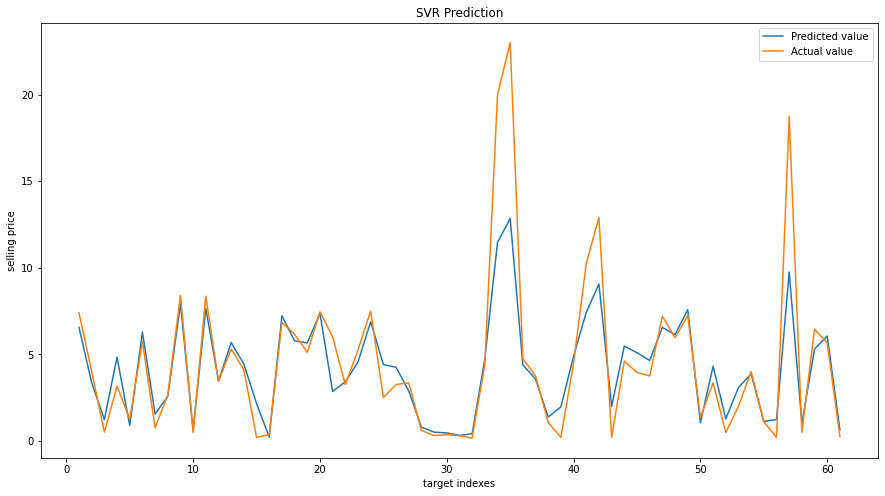

In [ ]:
plt.figure(figsize=(15,8))
index=range(1, len(svm_y_pred)+1)
plt.plot(index, svm_y_pred, label='Predicted value')
plt.plot(index, y_test, label='Actual value')
plt.title('SVR Prediction')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

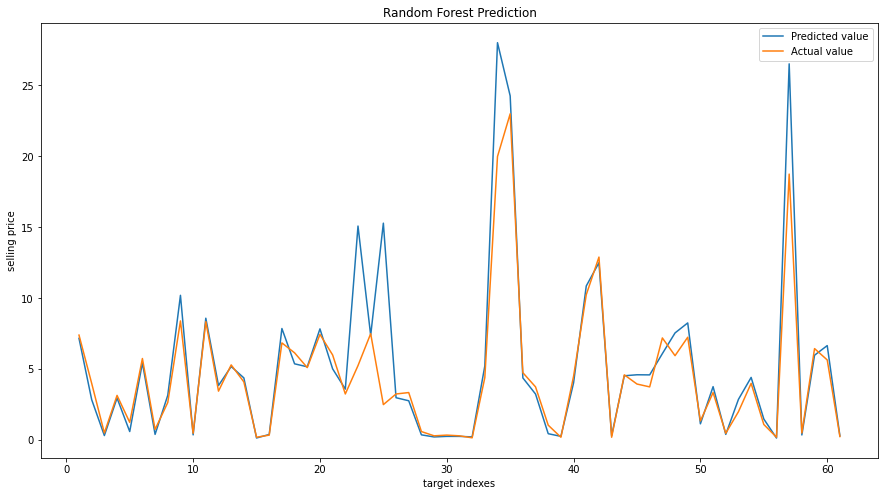

In [ ]:
plt.figure(figsize=(15,8))
index=range(1, len(Ran_y_pred)+1)
plt.plot(index, Ran_y_pred, label='Predicted value')
plt.plot(index, y_test, label='Actual value')
plt.title('Random Forest Prediction')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

Dstribution Plot for SVM model which has % of accuracy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


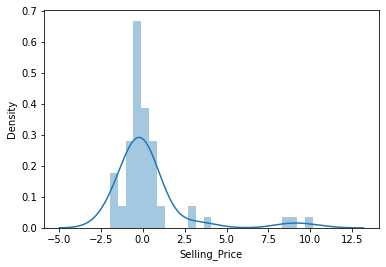

In [ ]:
sn.distplot(y_test-svm_y_pred)

Scatter Plot for SVM

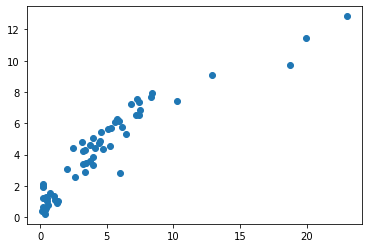

In [ ]:
plt.scatter(y_test,svm_y_pred)

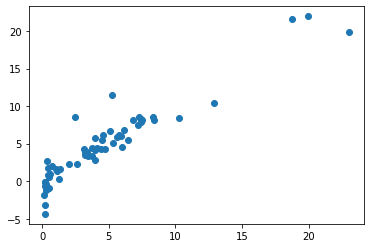

In [ ]:
plt.scatter(y_test,lm_y_pred)

In [ ]:
print(len(y_test))
print(len(lm_y_pred))

61
61


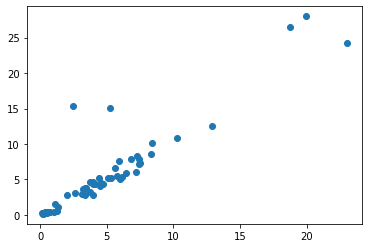

In [ ]:
plt.scatter(y_test,Ran_y_pred)

Manual Testing

In [ ]:
lm_y_pred_man = (1.25229390e-01, -8.86656252e-01, -2.56632451e-01,
        -9.37084310e-01, -4.94871659e-01,  5.20416500e-01,
        -7.51067616e-01, -2.13200716e+00)

In [ ]:
lm_y_pred_man_asarray = np.asarray(lm_y_pred_man)

In [ ]:
lm_y_pred_man_reshaped = lm_y_pred_man_asarray.reshape(1,-1)

In [ ]:
lm_y_pred_man1 = lm.predict(lm_y_pred_man_reshaped)

In [ ]:
lm_y_pred_man1

array([7.8937592])